In [17]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("../data/compound_features_with_scores.csv")



In [18]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=["wallet", "score"])
y = df["score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

model.fit(X_train_scaled, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [20]:
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


model.save_model("../model/xgboost_model.json")


MAE: 28.75
R² Score: 0.54


In [21]:
# Reaching 54 % r^2 score bad

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

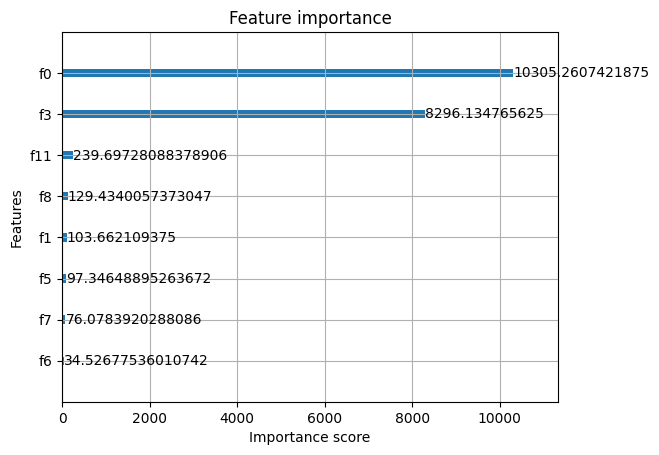

In [22]:
xgb.plot_importance(model, importance_type='gain', max_num_features=8)


In [23]:
model1 = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model1.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
y_pred = model1.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 17.17
R² Score: 0.81


In [25]:
#random forest is good 
 

In [26]:
import joblib
joblib.dump(model1, "../model/random_forest_model.joblib")

['../model/random_forest_model.joblib']

In [27]:
model1.predict(X_test)

c:\Users\rishe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([675.86, 663.98, 672.17, 663.76, 833.03, 664.28, 675.86, 663.76,
       664.28, 822.45, 663.76, 663.76, 663.76, 663.76, 663.76, 663.76,
       664.28, 663.76, 663.76, 749.2 , 663.76])

In [28]:
y_test

30     490
67     500
62     480
47     500
42     871
40     500
90     490
45     500
10     500
0      900
18     500
31     500
97     500
85     500
76     500
4      500
79     500
33     500
12     500
26     769
100    500
Name: score, dtype: int64

In [29]:
model.predict(X_train)

array([519.64374, 519.64374, 519.40094, 518.05505, 537.008  , 537.008  ,
       822.246  , 519.40094, 822.246  , 533.3378 , 519.40094, 519.64374,
       519.40094, 519.64374, 519.64374, 519.40094, 519.40094, 519.64374,
       519.64374, 519.40094, 519.40094, 519.64374, 519.64374, 519.40094,
       891.9451 , 822.246  , 519.40094, 845.23615, 519.40094, 519.40094,
       519.40094, 537.008  , 519.40094, 519.40094, 519.40094, 519.40094,
       519.40094, 537.008  , 519.40094, 519.40094, 519.40094, 519.40094,
       519.64374, 519.64374, 519.40094, 519.40094, 519.40094, 519.64374,
       518.05505, 519.40094, 519.40094, 519.40094, 519.40094, 519.40094,
       822.246  , 519.40094, 519.40094, 537.008  , 519.40094, 822.246  ,
       519.40094, 519.40094, 519.40094, 519.40094, 519.40094, 519.40094,
       519.40094, 846.7402 , 519.40094, 519.40094, 519.40094, 519.40094,
       519.64374, 519.40094, 537.008  , 519.40094, 519.40094, 519.40094,
       519.40094, 519.40094, 519.64374, 519.40094],

In [30]:
# :D predictions are coming correct
